## Preprocessing

In [26]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [27]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

In [28]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [29]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
value_counts = application_df['APPLICATION_TYPE'].value_counts()
print(value_counts)

# Choose a cutoff value and replace categories with counts below the cutoff with "Other"
cutoff = 500  # You can adjust this cutoff based on the output of value counts
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(
    lambda x: "Other" if value_counts[x] < cutoff else x
)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [30]:
# Determine the value counts of APPLICATION_TYPE
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Choose a cutoff value and create a list of application types to be replaced
cutoff = 500  # Adjust this value based on your analysis of value counts
application_types_to_replace = value_counts[value_counts < cutoff].index.tolist()

# Replace the specified application types with "Other" in the dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
updated_counts = application_df['APPLICATION_TYPE'].value_counts()
print(updated_counts)


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [31]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

# Choose a cutoff value and identify classifications to be replaced
cutoff = 1000  # You can adjust this cutoff based on the output of value counts
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace the specified classifications with "Other" in the dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
updated_classification_counts = application_df['CLASSIFICATION'].value_counts()
print(updated_classification_counts)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [32]:
# Look at CLASSIFICATION value counts that are greater than 1
classification_counts = application_df['CLASSIFICATION'].value_counts()
filtered_classifications = classification_counts[classification_counts > 1]
print(filtered_classifications)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [33]:
# Look at CLASSIFICATION value counts and determine a cutoff for replacement
classification_counts = application_df['CLASSIFICATION'].value_counts()
cutoff = 100  # Set your own cutoff here based on the distribution of the data
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace the specified classifications with "Other" in the dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
updated_classification_counts = application_df['CLASSIFICATION'].value_counts()
print(updated_classification_counts)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [34]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)

# Display the first few rows of the new DataFrame to verify the transformation
print(application_df_dummies.head())


   STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                   False   
1       1   108590              1                   False   
2       1     5000              0                   False   
3       1     6692              1                   False   
4       1   142590              1                   False   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                  True                 False                False   
1                 False                 False                 True   
2                 False                 False                False   
3                 False                 False                 True   
4                 False                 False                 True   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                False                False                False  ...   
1                False                False                False  

In [35]:
# Define the features and target arrays
X = application_df_dummies.drop('IS_SUCCESSFUL', axis=1)  # Features: drop the target column
y = application_df_dummies['IS_SUCCESSFUL']  # Target: the column we're trying to predict

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the dimensions of the train and test data to verify
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (27439, 43)
Testing Features Shape: (6860, 43)
Training Labels Shape: (27439,)
Testing Labels Shape: (6860,)


In [36]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Print the first 5 rows to verify scaling
print("Scaled Training Data Sample:")
print(X_train_scaled[:5])
print("Scaled Testing Data Sample:")
print(X_test_scaled[:5])

Scaled Training Data Sample:
[[ 0.01350021 -0.03115182 -0.09072351 -0.12527962 -0.17944646  0.51907853
  -0.21911203 -0.18792753 -0.19092108 -0.14669078 -0.14746666 -0.91883987
  -0.04399199  0.92492753 -0.02896422 -0.01207473 -0.01909392 -1.00933693
   2.48241006 -0.46452418 -0.24401553 -0.24552095 -0.26409579 -0.10793808
  -0.06599836 -0.00853781  0.4707167  -0.44526614 -0.65319408 -0.11991987
  -0.03416994  0.67719293  0.63603083 -0.14887949 -0.1270683  -0.32689081
  -0.08372388 -0.17037257 -0.35069127 -0.06459105 -0.07135527  0.02832705
  -0.02832705]
 [ 0.01350021 -0.03115182 -0.09072351 -0.12527962 -0.17944646  0.51907853
  -0.21911203 -0.18792753 -0.19092108 -0.14669078 -0.14746666 -0.91883987
  -0.04399199  0.92492753 -0.02896422 -0.01207473 -0.01909392  0.99074944
  -0.40283433 -0.46452418 -0.24401553 -0.24552095 -0.26409579 -0.10793808
  -0.06599836 -0.00853781  0.4707167  -0.44526614 -0.65319408 -0.11991987
  -0.03416994  0.67719293  0.63603083 -0.14887949 -0.1270683  -0.326

## Compile, Train and Evaluate the Model

In [37]:

# Count the number of input features
number_of_features = X_train_scaled.shape[1]

# Define the model
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(80, activation='relu', input_dim=X_train_scaled.shape[1]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=number_of_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the Sequential model together and print the summary
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the structure of the model
nn.summary()

c:\Users\maria\anaconda3\envs\dev\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 80)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,602 (33.60 KB)

 Trainable params: 8,602 (33.60 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6530 - loss: 0.6305 - val_accuracy: 0.7387 - val_loss: 0.5662
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7255 - loss: 0.5734 - val_accuracy: 0.7382 - val_loss: 0.5595
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7288 - loss: 0.5617 - val_accuracy: 0.7371 - val_loss: 0.5544
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7321 - loss: 0.5557 - val_accuracy: 0.7281 - val_loss: 0.5565
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7357 - loss: 0.5485 - val_accuracy: 0.7365 - val_loss: 0.5517
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7274 - loss: 0.5593 - val_accuracy: 0.7356 - val_loss: 0.5520
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7381 - loss: 0.5436 - val_accuracy: 0.7382 - val_loss: 0.5513
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7333 - loss: 0.5486 - val_accu

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7264 - loss: 0.5647
Loss: 0.5647010207176208, Accuracy: 0.7263848185539246


In [41]:
# Save the model to an HDF5 file with the specified name
nn.save("AlphabetSoupCharity_Optimisation.h5")

# Confirm the model has been saved
print("Model saved as 'AlphabetSoupCharity_Optimisation.h5' successfully!")



Model saved as 'AlphabetSoupCharity_Optimisation.h5' successfully!


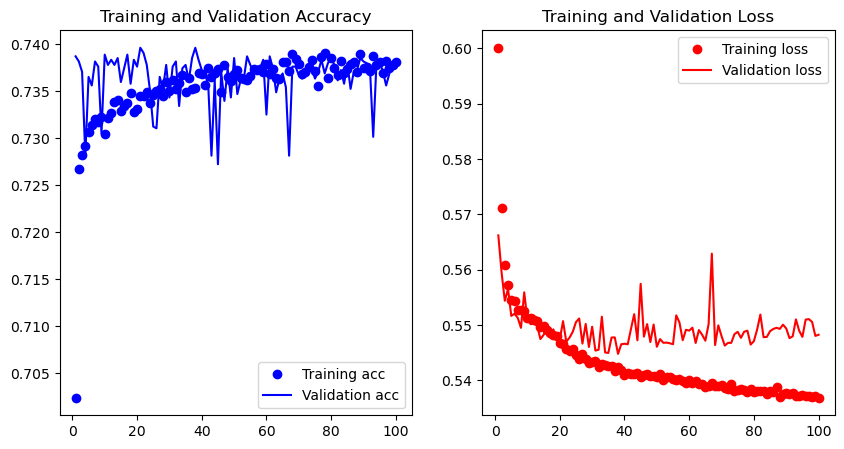

In [44]:
import matplotlib.pyplot as plt

# History object 'history' returned from model.fit()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
